<a href="https://colab.research.google.com/github/kharyal/GANs/blob/master/simpleGAN/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# from utils import Logger

In [0]:
batch_size=90
train = dsets.MNIST(root = './data', train = True,
                        transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ]), download = True)

test = dsets.MNIST(root = './data', train = False,
                       transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5,), (.5,))
        ]))
train_batch = torch.utils.data.DataLoader(dataset = train,
                                             batch_size = batch_size,
                         
                                             shuffle = True)

test_batch = torch.utils.data.DataLoader(dataset = test,
                                      batch_size = batch_size, 
                                      shuffle = False)

In [728]:
print(train.data.shape)
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

torch.Size([60000, 28, 28])


In [0]:
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator,self).__init__()
        ip=784
        op=1

        self.layer1=nn.Sequential(
            nn.Linear(ip,1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.layer2=nn.Sequential(
            nn.Linear(1024,512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        # self.layer3=nn.Sequential(
        #     nn.Linear(512,256),
        #     nn.LeakyReLU(0.2),
        #     nn.Dropout(0.3)
        # )

        self.layerOp=nn.Sequential(
            nn.Linear(512,op),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        # x=self.layer3(x)
        x=self.layerOp(x)
        return x

In [0]:
class generator(nn.Module):
    def __init__(self):
        super(generator,self).__init__()
        ip=100
        op=784

        self.layer1=nn.Sequential(
            nn.Linear(ip,256),
            nn.LeakyReLU()
        )

        self.layer2=nn.Sequential(
            nn.Linear(256,512),
            nn.LeakyReLU()
        )

        # self.layer3=nn.Sequential(
        #     nn.Linear(512,1024),
        #     nn.LeakyReLU()
        # )

        self.layerOp=nn.Sequential(
            nn.Linear(512,op),
            nn.Tanh()
        )

    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        # x=self.layer3(x)
        x=self.layerOp(x)
        return x       

In [0]:
discriminatorNet=discriminator()
generatorNet=generator()
# if torch.cuda.is_available():
#     discriminatorNet.cuda()
#     generatorNet.cuda()
optimizer_d = torch.optim.Adam(discriminatorNet.parameters(), lr=0.0002)
optimizer_g = torch.optim.Adam(generatorNet.parameters(), lr=0.0002)
loss=nn.BCELoss()

In [0]:
def ones_target(size):
    data = Variable(torch.ones(size, 1)).to(device)
    return data

def zeros_target(size):
    data = Variable(torch.zeros(size, 1)).to(device)
    return data

In [0]:
def trainDiscriminator(real_data, generated_data, optimizer):
    N=real_data.size(0)
    optimizer.zero_grad()

    ### real data
    opReal=discriminatorNet(real_data).to(device)
    errorR= loss(opReal,ones_target(N)).to(device)
    errorR.backward(retain_graph=True)
    # print('opR ',opReal)
    # optimizer.step()

    ### generated data
    opGen=discriminatorNet(generated_data).to(device)
    errorG= loss(opGen,zeros_target(N)).to(device)
    errorG.backward()
    # print('opG ',opGen)

    optimizer.step()
    return errorR+errorG, opReal, opGen 

In [0]:
def trainGenerator(optimizer, noise):
    N=noise.size(0)
    optimizer.zero_grad()
    generatedData=generatorNet(noise)
    op=discriminatorNet(generatedData).to(device)
    error=loss(op,ones_target(N)).to(device)
    error.backward()

    optimizer.step()
    return error

In [0]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(28, 28)

In [0]:
# print(train)

0
torch.Size([1, 784])


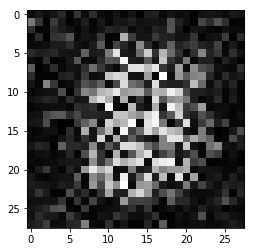

epoch G error:  tensor(4099.8105, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(136.2561, device='cuda:0', grad_fn=<AddBackward0>)
1
epoch G error:  tensor(3209.1982, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(200.1898, device='cuda:0', grad_fn=<AddBackward0>)
2
epoch G error:  tensor(3884.0933, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(44.4466, device='cuda:0', grad_fn=<AddBackward0>)
3
epoch G error:  tensor(4631.1821, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(49.5584, device='cuda:0', grad_fn=<AddBackward0>)
4
epoch G error:  tensor(4460.9238, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(55.3508, device='cuda:0', grad_fn=<AddBackward0>)
5
epoch G error:  tensor(4006.9500, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(93.5863, device='cuda:0', grad_fn=<AddBackward0>)
6
epoch G error:  tensor(4254.0171, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(

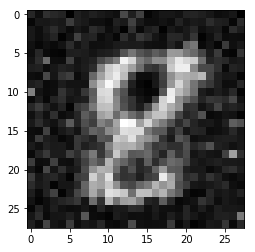

epoch G error:  tensor(2661.3308, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(204.9459, device='cuda:0', grad_fn=<AddBackward0>)
11
epoch G error:  tensor(2411.8743, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(237.7792, device='cuda:0', grad_fn=<AddBackward0>)
12
epoch G error:  tensor(2151.1272, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(264.2927, device='cuda:0', grad_fn=<AddBackward0>)
13
epoch G error:  tensor(1994.7496, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(295.6082, device='cuda:0', grad_fn=<AddBackward0>)
14
epoch G error:  tensor(1940.4401, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(285.5311, device='cuda:0', grad_fn=<AddBackward0>)
15
epoch G error:  tensor(1829.4910, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(316.8969, device='cuda:0', grad_fn=<AddBackward0>)
16
epoch G error:  tensor(1810.0577, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error

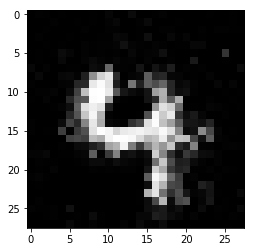

epoch G error:  tensor(1650.7792, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(387.4605, device='cuda:0', grad_fn=<AddBackward0>)
21
epoch G error:  tensor(1574.5553, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(404.6288, device='cuda:0', grad_fn=<AddBackward0>)
22
epoch G error:  tensor(1525.5907, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(417.9777, device='cuda:0', grad_fn=<AddBackward0>)
23
epoch G error:  tensor(1445.9907, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(441.7270, device='cuda:0', grad_fn=<AddBackward0>)
24
epoch G error:  tensor(1384.8573, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(458.9467, device='cuda:0', grad_fn=<AddBackward0>)
25
epoch G error:  tensor(1323.5067, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(467.5272, device='cuda:0', grad_fn=<AddBackward0>)
26
epoch G error:  tensor(1352.0510, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error

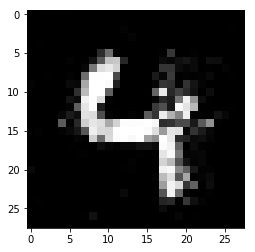

epoch G error:  tensor(1217.3755, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(531.0172, device='cuda:0', grad_fn=<AddBackward0>)
31
epoch G error:  tensor(1231.3203, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(541.4201, device='cuda:0', grad_fn=<AddBackward0>)
32
epoch G error:  tensor(1236.8634, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(549.8857, device='cuda:0', grad_fn=<AddBackward0>)
33
epoch G error:  tensor(1187.7908, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(552.7017, device='cuda:0', grad_fn=<AddBackward0>)
34
epoch G error:  tensor(1163.1470, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(561.4727, device='cuda:0', grad_fn=<AddBackward0>)
35
epoch G error:  tensor(1177.9150, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(565.6895, device='cuda:0', grad_fn=<AddBackward0>)
36
epoch G error:  tensor(1095.9104, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error

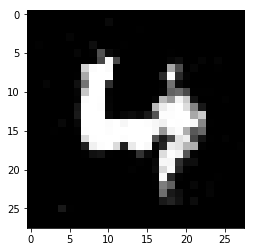

epoch G error:  tensor(1106.6847, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(601.6746, device='cuda:0', grad_fn=<AddBackward0>)
41
epoch G error:  tensor(1036.9064, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(606.4766, device='cuda:0', grad_fn=<AddBackward0>)
42
epoch G error:  tensor(1047.4539, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(604.8654, device='cuda:0', grad_fn=<AddBackward0>)
43
epoch G error:  tensor(1025.6743, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(618.1954, device='cuda:0', grad_fn=<AddBackward0>)
44
epoch G error:  tensor(1008.7352, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(624.1783, device='cuda:0', grad_fn=<AddBackward0>)
46
epoch G error:  tensor(975.8430, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(626.8040, device='cuda:0', grad_fn=<AddBackward0>)
47
epoch G error:  tensor(970.8773, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error: 

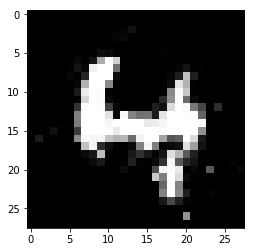

epoch G error:  tensor(939.9164, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(652.7667, device='cuda:0', grad_fn=<AddBackward0>)
51
epoch G error:  tensor(962.1855, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(669.5606, device='cuda:0', grad_fn=<AddBackward0>)
52
epoch G error:  tensor(948.4628, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(677.9225, device='cuda:0', grad_fn=<AddBackward0>)
53
epoch G error:  tensor(913.8552, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(663.7902, device='cuda:0', grad_fn=<AddBackward0>)
54
epoch G error:  tensor(914.4098, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(665.0555, device='cuda:0', grad_fn=<AddBackward0>)
55
epoch G error:  tensor(914.5329, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(675.6090, device='cuda:0', grad_fn=<AddBackward0>)
56
epoch G error:  tensor(890.8172, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tens

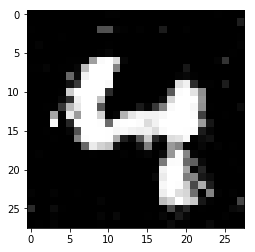

epoch G error:  tensor(888.9088, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(693.7822, device='cuda:0', grad_fn=<AddBackward0>)
61
epoch G error:  tensor(879.8328, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(691.5709, device='cuda:0', grad_fn=<AddBackward0>)
62
epoch G error:  tensor(871.7390, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(705.8727, device='cuda:0', grad_fn=<AddBackward0>)
63
epoch G error:  tensor(838.1332, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(707.0526, device='cuda:0', grad_fn=<AddBackward0>)
64
epoch G error:  tensor(853.3397, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(717.2963, device='cuda:0', grad_fn=<AddBackward0>)
65
epoch G error:  tensor(828.9338, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(705.0017, device='cuda:0', grad_fn=<AddBackward0>)
66
epoch G error:  tensor(875.4370, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tens

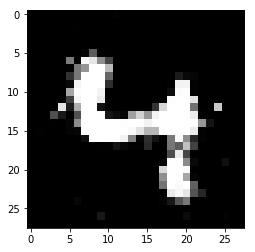

epoch G error:  tensor(810.2072, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(713.8439, device='cuda:0', grad_fn=<AddBackward0>)
71
epoch G error:  tensor(824.6918, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(716.9636, device='cuda:0', grad_fn=<AddBackward0>)
72
epoch G error:  tensor(874.9891, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(730.9847, device='cuda:0', grad_fn=<AddBackward0>)
73
epoch G error:  tensor(808.9926, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(728.1665, device='cuda:0', grad_fn=<AddBackward0>)
74
epoch G error:  tensor(810.4306, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(732.6827, device='cuda:0', grad_fn=<AddBackward0>)
75
epoch G error:  tensor(790.1287, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(721.7675, device='cuda:0', grad_fn=<AddBackward0>)
76
epoch G error:  tensor(797.7210, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tens

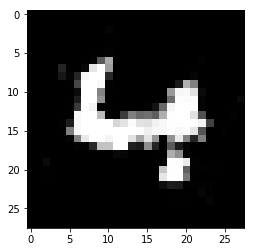

epoch G error:  tensor(792.1413, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(736.2106, device='cuda:0', grad_fn=<AddBackward0>)
81
epoch G error:  tensor(808.5378, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(745.9615, device='cuda:0', grad_fn=<AddBackward0>)
82
epoch G error:  tensor(777.3633, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(741.8528, device='cuda:0', grad_fn=<AddBackward0>)
83
epoch G error:  tensor(797.0438, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(741.2715, device='cuda:0', grad_fn=<AddBackward0>)
84
epoch G error:  tensor(776.7355, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(736.5249, device='cuda:0', grad_fn=<AddBackward0>)
85
epoch G error:  tensor(783.6652, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(742.2541, device='cuda:0', grad_fn=<AddBackward0>)
86
epoch G error:  tensor(779.6203, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tens

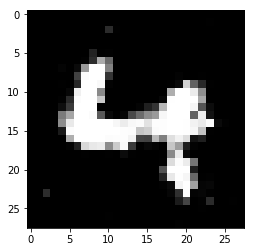

epoch G error:  tensor(766.3990, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(751.1129, device='cuda:0', grad_fn=<AddBackward0>)
91
epoch G error:  tensor(783.6418, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(760.4876, device='cuda:0', grad_fn=<AddBackward0>)
92
epoch G error:  tensor(759.6566, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(743.6525, device='cuda:0', grad_fn=<AddBackward0>)
93
epoch G error:  tensor(783.3192, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(748.3851, device='cuda:0', grad_fn=<AddBackward0>)
94
epoch G error:  tensor(768.2311, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(742.2562, device='cuda:0', grad_fn=<AddBackward0>)
95
epoch G error:  tensor(782.2970, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(745.1146, device='cuda:0', grad_fn=<AddBackward0>)
96
epoch G error:  tensor(772.7074, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tens

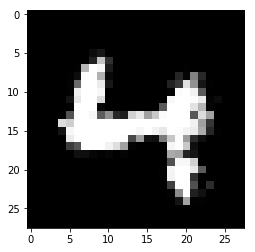

epoch G error:  tensor(771.8975, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(749.1898, device='cuda:0', grad_fn=<AddBackward0>)
101
epoch G error:  tensor(756.2025, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(748.4950, device='cuda:0', grad_fn=<AddBackward0>)
102
epoch G error:  tensor(761.0464, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(762.4078, device='cuda:0', grad_fn=<AddBackward0>)
103
epoch G error:  tensor(755.3760, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(756.9257, device='cuda:0', grad_fn=<AddBackward0>)
104
epoch G error:  tensor(757.2030, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(746.9227, device='cuda:0', grad_fn=<AddBackward0>)
105
epoch G error:  tensor(754.8463, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(756.9124, device='cuda:0', grad_fn=<AddBackward0>)
106
epoch G error:  tensor(762.5771, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

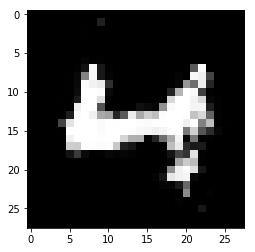

epoch G error:  tensor(748.4055, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(756.8632, device='cuda:0', grad_fn=<AddBackward0>)
111
epoch G error:  tensor(756.5888, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(762.0516, device='cuda:0', grad_fn=<AddBackward0>)
112
epoch G error:  tensor(741.2870, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(762.5950, device='cuda:0', grad_fn=<AddBackward0>)
113
epoch G error:  tensor(747.5984, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(757.7979, device='cuda:0', grad_fn=<AddBackward0>)
114
epoch G error:  tensor(769.3408, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(769.6586, device='cuda:0', grad_fn=<AddBackward0>)
115
epoch G error:  tensor(733.1008, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(761.1331, device='cuda:0', grad_fn=<AddBackward0>)
116
epoch G error:  tensor(751.9037, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

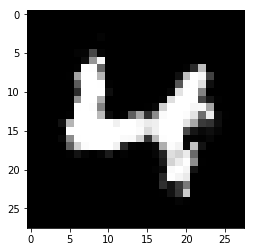

epoch G error:  tensor(740.3535, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(760.6151, device='cuda:0', grad_fn=<AddBackward0>)
121
epoch G error:  tensor(748.7189, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(760.2443, device='cuda:0', grad_fn=<AddBackward0>)
122
epoch G error:  tensor(745.4764, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(761.5387, device='cuda:0', grad_fn=<AddBackward0>)
123
epoch G error:  tensor(746.3746, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(764.4199, device='cuda:0', grad_fn=<AddBackward0>)
124
epoch G error:  tensor(735.0984, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(762.8824, device='cuda:0', grad_fn=<AddBackward0>)
125
epoch G error:  tensor(749.0383, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(763.2264, device='cuda:0', grad_fn=<AddBackward0>)
126
epoch G error:  tensor(730.3691, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

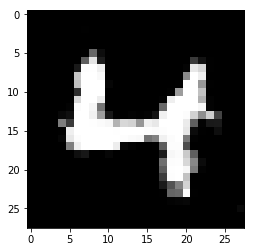

epoch G error:  tensor(738.5425, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(769.9861, device='cuda:0', grad_fn=<AddBackward0>)
131
epoch G error:  tensor(727.3084, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(765.0652, device='cuda:0', grad_fn=<AddBackward0>)
132
epoch G error:  tensor(737.8204, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(768.3135, device='cuda:0', grad_fn=<AddBackward0>)
133
epoch G error:  tensor(732.0084, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(770.3716, device='cuda:0', grad_fn=<AddBackward0>)
134
epoch G error:  tensor(732.8400, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(766.4480, device='cuda:0', grad_fn=<AddBackward0>)
135
epoch G error:  tensor(730.7740, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(765.8860, device='cuda:0', grad_fn=<AddBackward0>)
136
epoch G error:  tensor(731.9127, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

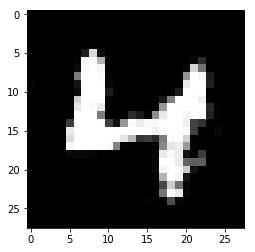

epoch G error:  tensor(720.9020, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(774.1107, device='cuda:0', grad_fn=<AddBackward0>)
141
epoch G error:  tensor(721.8695, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(773.9553, device='cuda:0', grad_fn=<AddBackward0>)
142
epoch G error:  tensor(732.7838, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(776.3632, device='cuda:0', grad_fn=<AddBackward0>)
143
epoch G error:  tensor(717.4943, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(770.4380, device='cuda:0', grad_fn=<AddBackward0>)
144
epoch G error:  tensor(718.7549, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(772.9589, device='cuda:0', grad_fn=<AddBackward0>)
145
epoch G error:  tensor(721.0287, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(773.2056, device='cuda:0', grad_fn=<AddBackward0>)
146
epoch G error:  tensor(730.1831, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

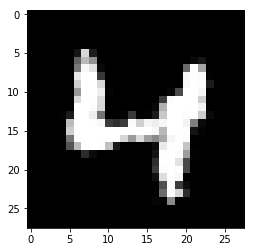

epoch G error:  tensor(719.9904, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(770.3511, device='cuda:0', grad_fn=<AddBackward0>)
151
epoch G error:  tensor(725.5337, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(769.4299, device='cuda:0', grad_fn=<AddBackward0>)
152
epoch G error:  tensor(726.9415, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(775.0985, device='cuda:0', grad_fn=<AddBackward0>)
153
epoch G error:  tensor(714.2928, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.7568, device='cuda:0', grad_fn=<AddBackward0>)
154
epoch G error:  tensor(715.7468, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(777.6710, device='cuda:0', grad_fn=<AddBackward0>)
155
epoch G error:  tensor(714.4095, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(776.1105, device='cuda:0', grad_fn=<AddBackward0>)
156
epoch G error:  tensor(724.2025, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

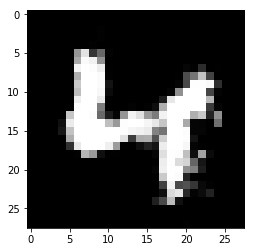

epoch G error:  tensor(717.6946, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(782.3752, device='cuda:0', grad_fn=<AddBackward0>)
161
epoch G error:  tensor(710.2051, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(774.4114, device='cuda:0', grad_fn=<AddBackward0>)
162
epoch G error:  tensor(713.6279, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(777.9592, device='cuda:0', grad_fn=<AddBackward0>)
163
epoch G error:  tensor(723.9594, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(776.3531, device='cuda:0', grad_fn=<AddBackward0>)
164
epoch G error:  tensor(713.0717, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(777.1349, device='cuda:0', grad_fn=<AddBackward0>)
165
epoch G error:  tensor(715.7289, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(776.4881, device='cuda:0', grad_fn=<AddBackward0>)
166
epoch G error:  tensor(723.7396, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

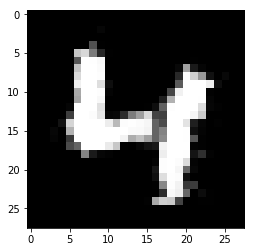

epoch G error:  tensor(706.9782, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(775.0790, device='cuda:0', grad_fn=<AddBackward0>)
171
epoch G error:  tensor(720.3047, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.2889, device='cuda:0', grad_fn=<AddBackward0>)
172
epoch G error:  tensor(713.4270, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.4005, device='cuda:0', grad_fn=<AddBackward0>)
173
epoch G error:  tensor(719.3203, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.6071, device='cuda:0', grad_fn=<AddBackward0>)
174
epoch G error:  tensor(703.3755, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.7447, device='cuda:0', grad_fn=<AddBackward0>)
175
epoch G error:  tensor(714.2645, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.9108, device='cuda:0', grad_fn=<AddBackward0>)
176
epoch G error:  tensor(711.4984, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

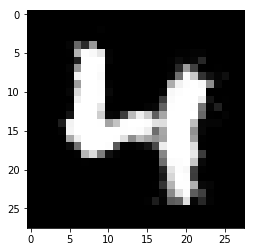

epoch G error:  tensor(705.5847, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(781.3447, device='cuda:0', grad_fn=<AddBackward0>)
181
epoch G error:  tensor(715.0170, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.7696, device='cuda:0', grad_fn=<AddBackward0>)
182
epoch G error:  tensor(705.2996, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.6174, device='cuda:0', grad_fn=<AddBackward0>)
183
epoch G error:  tensor(710.4275, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.1247, device='cuda:0', grad_fn=<AddBackward0>)
184
epoch G error:  tensor(712.6044, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(780.4313, device='cuda:0', grad_fn=<AddBackward0>)
185
epoch G error:  tensor(710.2122, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(786.9391, device='cuda:0', grad_fn=<AddBackward0>)
186
epoch G error:  tensor(707.3104, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

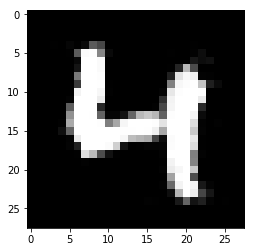

epoch G error:  tensor(718.3260, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(784.3619, device='cuda:0', grad_fn=<AddBackward0>)
191
epoch G error:  tensor(702.8353, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.7932, device='cuda:0', grad_fn=<AddBackward0>)
192
epoch G error:  tensor(714.0956, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.4701, device='cuda:0', grad_fn=<AddBackward0>)
193
epoch G error:  tensor(708.7381, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(781.2780, device='cuda:0', grad_fn=<AddBackward0>)
194
epoch G error:  tensor(711.0270, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(783.7773, device='cuda:0', grad_fn=<AddBackward0>)
195
epoch G error:  tensor(704.3491, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.2641, device='cuda:0', grad_fn=<AddBackward0>)
196
epoch G error:  tensor(708.3380, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:

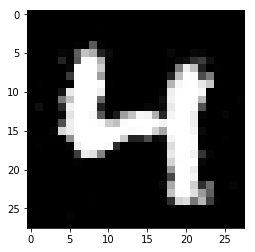

epoch G error:  tensor(708.0579, device='cuda:0', grad_fn=<AddBackward0>)
epoch D error:  tensor(779.9778, device='cuda:0', grad_fn=<AddBackward0>)


In [737]:
epochs=201
op=[]
# logger = Logger(model_name='VGAN', data_name='MNIST')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generatorNet=generatorNet.to(device)
discriminatorNet=discriminatorNet.to(device)
randtest=Variable(torch.randn(1, 100)).to(device)
totalGerr=0
totalDerr=0
for epoch in range(epochs):
    print(epoch)
    totalGerr=0
    totalDerr=0
    for n_batch, (real_batch,_) in enumerate(train_batch):
        # n_batch=n_batch.to(device)
        real_batch=real_batch.to(device)
        N=real_batch.size(0)

        # print('Discriminator part')
        real_data = Variable(images_to_vectors(real_batch))
        rand=Variable(torch.randn(N, 100)).to(device)
        gen=generatorNet(rand).detach()
        # op=vectors_to_images(gen)
        # print(op.shape)
        # plt.imshow(op)
        # plt.show()
        gen=gen.to(device)
        d_error, d_pred_real, d_pred_fake = trainDiscriminator(real_data, gen, optimizer_d)
        totalDerr=totalDerr+d_error

        # print('Generator Part')
        noise=Variable(torch.randn(N, 100)).to(device)
        g_error = trainGenerator(optimizer_g, noise).to(device)
        totalGerr=totalGerr+g_error
        

    if epoch%10==0:
        op=generatorNet(randtest).detach()
        print(op.shape)
        op=vectors_to_images(op)
        op=op.cpu().detach().numpy()
        plt.imshow(op,cmap='gray')
        plt.show()
    print('epoch G error: ',totalGerr)
    print('epoch D error: ',totalDerr)
    # real_batch=real_batch.detach()
    #     break.to(device)
    # break

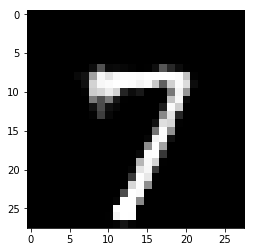

In [784]:
noise=Variable(torch.randn(1, 100)).to(device)
op=generatorNet(noise).detach()
op=vectors_to_images(op)
op=op.cpu().detach().numpy()
plt.imshow(op,cmap='gray')
plt.show()